CLOTHING BRANDS PREDICTION

A clothing brand is a business or label that operates within the fashion industry, specializing in creating and selling clothing and apparel. It encompasses designing, manufacturing, marketing, and distributing garments, targeting specific customer segments or the target market.
The data has been collected from different sources and we will be making two predictions- Price(Regression) and Occassion(Classification).

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data set
data=pd.read_csv('clothing_b.csv')

In [3]:
data.head()

,Sno,Brand,Category,Product_type,Product_Name,Product_code,Price,Wear_type,Material_type,Reviews,color1,color2,Country_of_origin,Return_time,Size1,Size2,Size3,Size4,Occassion
0,0,Vedant Fashions Ltd.,Men,Kurta Pajama,Rust Orange Printed Kurta Set,SOSK630-332,"₹ 3,499",Kurta Pajama,--------,674 people have viewed the product recently,--------,--------,India,15.0,S,M,L,XL,Indo Western
1,1,Vedant Fashions Ltd.,Men,Kurta Pajama,Flamingo Pink Chikankari Embroidered Kurta Set,SDES820-325,"₹ 4,999",Kurta Pajama,--------,674 people have viewed the product recently,--------,NaN,India,15.0,S,M,L,XL,Indo Western
2,2,Vedant Fashions Ltd.,Men,Kurta Pajama,Teal Blue Chikankari Patterned Kurta Set,SDES820-326,"₹ 4,999",Kurta Pajama,NaN,674 people have viewed the product recently,NaN,NaN,India,15.0,S,M,L,XL,Indo Western
3,3,Vedant Fashions Ltd.,Men,Kurta Pajama,Lime Green Chikankari Kurta Set,SDES784-334,"₹ 3,999",Kurta Pajama,NaN,--------,NaN,NaN,--------,NaN,S,M,L,XL,Indo Western
4,4,Vedant Fashions Ltd.,Men,Kurta Pajama,Quartz Pink Mandala Printed Kurta Set,CPOSK666-325,"₹ 4,999",Kurta Pajama,NaN,674 people have viewed the product recently,NaN,--------,India,15.0,S,M,L,XL,Indo Western


In [5]:
#Checking random samples
data.sample(15)

,Sno,Brand,Category,Product_type,Product_Name,Product_code,Price,Wear_type,Material_type,Reviews,color1,color2,Country_of_origin,Return_time,Size1,Size2,Size3,Size4,Occassion
117,117,Vedant Fashions Ltd.,Men,Kurta Pajama,Black Chikankari Kurta Set,CPOSK612-310,"₹ 3,999",Kurta Pajama,--------,674 people have viewed the product recently,--------,NaN,India,15.0,S,M,L,XL,Indo Western
112,112,Vedant Fashions Ltd.,Men,Kurta Pajama,Green Kurta With Embroidered Collar,SDES712-317,"₹ 2,999",Kurta Pajama,NaN,--------,NaN,--------,--------,NaN,S,M,L,XL,Indo Western
315,315,BIBA,Women,Kurta,RED & OFF WHITE COTTON BLEND STRAIGHT KURTA SU...,SKDKINARI8613SS23REDOWHT,"₹10,950","Kurta, Churidar, Dupatta",NaN,"When it comes to ethnic wear for women, the on...",Onion Pink,Sape Green,India,15.0,32,34,36,38,Festive
589,589,Stop,Boys,T-Shirt,Printed Cotton Round Neck Boys T-Shirt,A23710BTEE36_YELLOW,199,T-Shirt,Nylon,View available services for your pincode\nStan...,Blue,NaN,India,14.0,2-3 Y,3-4 Y,5-6 Y,7-8 Y,Casual Wear
149,149,Vedant Fashions Ltd.,Men,Kurta Pajama,Maroon Self Patterned Kurta Set,SDES993-307,"₹ 2,499",Kurta Pajama,--------,--------,--------,NaN,--------,NaN,S,M,L,XL,Indo Western
502,502,Pantaloons,KIDS,Dresses,Pink Print Casual Cap Sleeves Round Neck Baby ...,NaN,₹ 999,Dresses,Cotton,Be the first one to rate!,Pink,NaN,India,30.0,3-6 M,6-9 M,9-12 M,12-18 M,Western wear
489,489,Pantaloons,KIDS,Dresses,Yellow Print Casual Cap Sleeves Round Neck Bab...,NaN,₹ 799,Dresses,Cotton,Be the first one to rate!,Yellow,NaN,India,30.0,3-6 M,6-9 M,9-12 M,12-18 M,Western wear
71,71,Vedant Fashions Ltd.,Men,Kurta Pajama,Wine Self Design Kurta With Black Churidar,S952612-322,"₹ 3,999",Kurta Pajama,--------,674 people have viewed the product recently,--------,NaN,India,15.0,S,M,L,XL,Indo Western
86,86,Vedant Fashions Ltd.,Men,Kurta Pajama,Sand White Jacquard Patterned Kurta Set,SDES661-302,"₹ 2,999",Kurta Pajama,--------,124 people have viewed the product recently,--------,--------,India,15.0,S,M,L,XL,Indo Western
466,466,Pantaloons,KIDS,Dresses,Green Printed Rayon Square Neck Girls Regular ...,NaN,₹ 1749,Dresses,Rayon,Be the first one to rate!,Green,NaN,India,30.0,8-9Y,9-10Y,11-12Y,13-14Y,Western wear


In [4]:
#Checking shape of datsa
data.shape

(610, 19)

In [5]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sno                610 non-null    int64  
 1   Brand              610 non-null    object 
 2   Category           610 non-null    object 
 3   Product_type       610 non-null    object 
 4   Product_Name       610 non-null    object 
 5   Product_code       510 non-null    object 
 6   Price              610 non-null    object 
 7   Wear_type          576 non-null    object 
 8   Material_type      333 non-null    object 
 9   Reviews            610 non-null    object 
 10  color1             535 non-null    object 
 11  color2             366 non-null    object 
 12  Country_of_origin  519 non-null    object 
 13  Return_time        540 non-null    float64
 14  Size1              610 non-null    object 
 15  Size2              610 non-null    object 
 16  Size3              610 non

Except Sno and Return time, all other columns have object type data. Also, few variables like Product_code, color1, color2 etc have Null values present.

In [6]:
#Checking for exact number of nulls for each variable
data.isnull().sum()

Sno                    0
Brand                  0
Category               0
Product_type           0
Product_Name           0
Product_code         100
Price                  0
Wear_type             34
Material_type        277
Reviews                0
color1                75
color2               244
Country_of_origin     91
Return_time           70
Size1                  0
Size2                  0
Size3                  0
Size4                  0
Occassion              0
dtype: int64

Product_code, Material_type and color2 have high number of missing values. Other variables like Wear_type,color1, Country_of_origin and Return_time also have few missing values. 

In [7]:
#Let's check number of unique values in each column
data.nunique()

Sno                  610
Brand                 10
Category               5
Product_type          16
Product_Name         544
Product_code         505
Price                 77
Wear_type             48
Material_type         17
Reviews               23
color1                86
color2                30
Country_of_origin      4
Return_time            3
Size1                 15
Size2                 15
Size3                 19
Size4                 19
Occassion             15
dtype: int64

In [13]:
data['Brand'].unique()

array(['Vedant Fashions Ltd.', 'BIBA', 'Pantaloons', 'Intune', 'Life',
       'Infuse', 'Stop', 'Pipin', 'Arrow Sport', 'Crimsoune Club'],
      dtype=object)

In [14]:
data['Category'].unique()

array(['Men', 'Women', 'KIDS', 'Boys', '--------'], dtype=object)

In [15]:
data['Wear_type'].unique()

array(['Kurta Pajama', 'Kurta, Pant, Dupatta', 'Kurta, Palazzo, Stole',
       'Kurta, Palazzo, Dupatta', 'Kurta, Palazzo', nan,
       'Kurta, Churidar, Dupatta', 'Kurta, Inner, Palazzo, Dupatta',
       'Kurta, Salwar, Dupatta', 'Kurta, Bottom, Dupatta',
       'Kurta, Jacket, Pant', 'Kurta, Garara, Dupatta', 'Kurta, Pant',
       'Kurta, Palazzo, Scarf', 'Kurta, Palazzo, Dupatta, Potli',
       'Kurta, Straight Palazzo', 'Kurta, Slim Pant, Dupatta',
       'Kurta, Skirt, Dupatta', 'Kurta, Salwar Pant, Dupatta',
       'Kurta, Straight Palazzo, Dupatta',
       'Kurta, Inner, Cuffed Salwar, Dupatta', 'Kurta, Slim Pant, Stole',
       'Kurta, Inner, Churidar, Dupatta', 'Kurta, Garara, Dupatta, Mask',
       'Kurta, Garara, Stole', 'Blouse, Lehenga, Dupatta', '2N',
       'Kurta, Inner, Salwar, Dupatta', 'Sal, Kur, Dup', '4N',
       'Top, Skirt, Dupatta', 'Kurta, Slim Pant, Dupatta, Potli Bag',
       'Kurta, Lehenga, Dupatta', 'Top, Skirt', 'Kurta, Sharara, Dupatta',
       'Kurta, J

In [16]:
data['Material_type'].unique()

array(['--------', nan, 'A-Line', 'With Dupatta', 'Polyester',
       'Rayon (LIVA)', 'Rayon', 'Cotton', '100% Cotton', 'Distress',
       'Polyster', '1 T-Shirt', 'Dark Wash', 'Mid Wash', '1', 'Nylon',
       '100% Rayon', 'Casual Wear'], dtype=object)

In [17]:
data['Country_of_origin'].unique()

array(['India', '--------', nan, 'IndiaIIndianIndiadIndiaiIndiaaIndia',
       '1'], dtype=object)

In [18]:
data['Return_time'].unique()

array([15., nan, 30., 14.])

In [19]:
data['Size1'].unique()

array(['S', '32', '34', '30', '2-3Y', '8-9Y', '1-2Y', '6-9 M', '--------',
       '3-6 M', '1-2 Y', '2-3 Y', '11-12 Y', '10-11 YEARS', '11-12 YEARS'],
      dtype=object)

In [146]:
data['Size2'].unique()

array(['M', '34', '36', '32', '3-4Y', '9-10Y', '2-3Y', '9-12 M',
       '--------', '6-9 M', '2-3 Y', '3-4 Y', '13-14 Y', '12-13 Y',
       '2-3 YR'], dtype=object)

In [22]:
data['Size3'].unique()

array(['L', '36', '38', '34', '4-5Y', '11-12Y', '3-4Y', '12-18 M',
       '--------', '9-12 M', '3-4 Y', '5-6 Y', '15-16 Y', '2-3 Y',
       '14-15 Y', '8-9 Y', '9-10 Y', '5-6Y', '3-4 YR'], dtype=object)

In [23]:
data['Size4'].unique()

array(['XL', '38', '42', '40', '--------', '36', '5-6Y', '13-14Y', '4-5Y',
       '18-24 M', '12-18 M', '5-6 Y', '7-8 Y', '8-9 Y', '3-4 Y', '9-10 Y',
       '16-17Y', '7-8Y', '5-6 YR'], dtype=object)

In [24]:
data['Occassion'].unique()

array(['Indo Western', 'Festive', 'Western wear', '--------',
       'Casual Wear', '1', 'Checks', 'Graphic Print', 'Shorts', 'Printed',
       'Solid', 'Color Block', 'Knitted', 'Shirts', 'Full Sleeves'],
      dtype=object)

In [114]:
data['Product_type'].unique()

array(['Kurta Pajama', 'Kurta', 'Blouse', 'Dresses', 'T-Shirt',
       'T-Shirt Fit', 'Zipper', 'Full Sleeves', '--------', 'Button',
       'Shorts', 'Track Pants', 'Casual Wear', 'Shirt', 'Denim',
       'Hip Length'], dtype=object)

In [8]:
#Finding hidden missing values for Product_type column
data['Product_type'] = data['Product_type'].str.replace('--------', 'NaN', regex=True)
data['Product_type'] = data['Product_type'].str.replace('Zipper', 'NaN', regex=True)
data['Product_type'] = data['Product_type'].str.replace('Full Sleeves', 'NaN', regex=True)
data['Product_type'] = data['Product_type'].str.replace('Casual Wear', 'NaN', regex=True)
data['Product_type'] = data['Product_type'].str.replace('Hip Length', 'NaN', regex=True)
data['Product_type'] = data['Product_type'].str.replace('Button', 'NaN', regex=True)

In [9]:
data['Product_type'].unique()

array(['Kurta Pajama', 'Kurta', 'Blouse', 'Dresses', 'T-Shirt',
       'T-Shirt Fit', 'NaN', 'Shorts', 'Track Pants', 'Shirt', 'Denim'],
      dtype=object)

In [10]:
#Finding hidden missing values for Category column
data['Category'] = data['Category'].str.replace('--------', 'NaN', regex=True)

In [11]:
#Finding hidden missing values for Material_type column
data['Material_type'] = data['Material_type'].str.replace('Casual Wear', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('NaN T-Shirt', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('NaN00% Cotton', 'Cotton', regex=True)
data['Material_type'] = data['Material_type'].str.replace('NaN00% Rayon', 'Rayon', regex=True)
data['Material_type'] = data['Material_type'].str.replace('With Dupatta', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('A-Line', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('Mid Wash', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('Dark Wash', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('Distress', 'NaN', regex=True)
data['Material_type'] = data['Material_type'].str.replace('--------', 'NaN', regex=True)

In [12]:
data['Material_type'] = data['Material_type'].str.replace('1', 'NaN', regex=True)

In [13]:
data['Material_type'].unique()

array(['NaN', nan, 'Polyester', 'Rayon (LIVA)', 'Rayon', 'Cotton',
       'NaN00% Cotton', 'Polyster', 'NaN T-Shirt', 'Nylon',
       'NaN00% Rayon'], dtype=object)

In [14]:
#Finding hidden missing  values for Country_of_origin column
data['Country_of_origin'] = data['Country_of_origin'].str.replace('IndiaIIndianIndiadIndiaiIndiaaIndia', 'India', regex=True)
data['Country_of_origin'] = data['Country_of_origin'].str.replace('1', 'India', regex=True)
data['Country_of_origin'] = data['Country_of_origin'].str.replace('--------', 'NaN', regex=True)


In [15]:
data['Country_of_origin'].unique()

array(['India', 'NaN', nan], dtype=object)

In [16]:
#Finding hidden missing values for Wear_type column
data['Wear_type'] = data['Wear_type'].str.replace('--------', 'NaN', regex=True)
data['Wear_type'] = data['Wear_type'].str.replace('2N', 'NaN', regex=True)
data['Wear_type'] = data['Wear_type'].str.replace('4N', 'NaN', regex=True)
data['Wear_type'] = data['Wear_type'].str.replace('Printed', 'NaN', regex=True)
data['Wear_type'] = data['Wear_type'].str.replace('Collared', 'NaN', regex=True)

In [17]:
data['Wear_type'].unique()

array(['Kurta Pajama', 'Kurta, Pant, Dupatta', 'Kurta, Palazzo, Stole',
       'Kurta, Palazzo, Dupatta', 'Kurta, Palazzo', nan,
       'Kurta, Churidar, Dupatta', 'Kurta, Inner, Palazzo, Dupatta',
       'Kurta, Salwar, Dupatta', 'Kurta, Bottom, Dupatta',
       'Kurta, Jacket, Pant', 'Kurta, Garara, Dupatta', 'Kurta, Pant',
       'Kurta, Palazzo, Scarf', 'Kurta, Palazzo, Dupatta, Potli',
       'Kurta, Straight Palazzo', 'Kurta, Slim Pant, Dupatta',
       'Kurta, Skirt, Dupatta', 'Kurta, Salwar Pant, Dupatta',
       'Kurta, Straight Palazzo, Dupatta',
       'Kurta, Inner, Cuffed Salwar, Dupatta', 'Kurta, Slim Pant, Stole',
       'Kurta, Inner, Churidar, Dupatta', 'Kurta, Garara, Dupatta, Mask',
       'Kurta, Garara, Stole', 'Blouse, Lehenga, Dupatta', 'NaN',
       'Kurta, Inner, Salwar, Dupatta', 'Sal, Kur, Dup',
       'Top, Skirt, Dupatta', 'Kurta, Slim Pant, Dupatta, Potli Bag',
       'Kurta, Lehenga, Dupatta', 'Top, Skirt', 'Kurta, Sharara, Dupatta',
       'Kurta, Jacket

In [18]:
#Finding hidden missing values for Size1 column
data['Size1'] = data['Size1'].str.replace('--------', 'NaN', regex=True)

In [19]:
#Finding hidden missing values for Size2 column
data['Size2'] = data['Size2'].str.replace('--------', 'NaN', regex=True)

In [20]:
#Finding hidden missing values for Size3 column
data['Size3'] = data['Size3'].str.replace('--------', 'NaN', regex=True)

In [21]:
#Finding hidden missing values for Size4 column
data['Size4'] = data['Size4'].str.replace('--------', 'NaN', regex=True)

In [22]:
#Finding hidden missing values for Occassion column
data['Occassion'] = data['Occassion'].str.replace('--------', 'NaN', regex=True)

In [23]:
data['Occassion'] = data['Occassion'].str.replace('1', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Checks', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Graphic Print', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Shorts', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Printed', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Solid', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Color Block', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Knitted', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Shirts', 'NaN', regex=True)
data['Occassion'] = data['Occassion'].str.replace('Full Sleeves', 'NaN', regex=True)

In [24]:
data['Occassion'].unique()

array(['Indo Western', 'Festive', 'Western wear', 'NaN', 'Casual Wear'],
      dtype=object)

In [25]:
data['color1'].unique()

array(['--------', nan, 'Brick Red', 'Blush Pink', 'Light Green',
       'Mustard', 'Green', 'Berry Pink', 'Blue', 'Black', 'Mango Yellow',
       'Pink-Purple', 'Fuschia', 'Yellow', 'Dark Red', 'White', 'Pink',
       'Red', 'Electric Blue', 'Off White Red', 'Grey', 'Offwhite-Blue',
       'Coral-Pink', 'Coral', 'Teal', 'Dusty Pink', 'Violet', 'Indigo',
       'Mango', 'Fuschia Pink', 'Ice Blue', 'White Blue', 'Offwhite',
       'Powder Blue', 'Lime Green', 'Beige', 'White Pink', 'Lilac',
       'Peach', 'Orange', 'White Grey', 'Khaki', 'Sea Green', 'Off White',
       'Red-Offwhite', 'Sape Green', 'Earthy Peach', 'Bright Pink',
       'Aqua Blue', 'Navy Blue', 'Pastel Blue', 'Light Blue',
       'Sage Green', 'Turquoise', 'Mehandi', 'Onion Pink', 'Terracotta',
       'Light Pink', 'Ochre', 'Offwhite-Peach', 'Yellow-Blue', 'Charcoal',
       'Batik Blue', 'Berry', 'Dark Green', 'Slate Blue', 'Purple',
       'Choco Brown', 'Dusky Pink', 'Meganta', 'Peacock Green', 'Maroon',
       'Fu

In [26]:
#Finding hidden missing values for color1 column
data['color1'] = data['color1'].str.replace('--------', 'NaN', regex=True)
data['color1'] = data['color1'].str.replace('Regular Fit', 'NaN', regex=True)
data['color1'] = data['color1'].str.replace('Rayon', 'NaN', regex=True)

In [27]:
data['color2'].unique()

array(['--------', nan, 'Powder Blue', 'Coral', 'Blue', 'Pink',
       'Dark Blue', 'Aqua', 'Yellow', 'Indigo', 'Fuschia', 'Red',
       'White Red', 'Pink-Purple', 'Turquoise', 'Cream', 'Sape Green',
       'Sky Blue', 'Beige', 'Ivory', 'Black', 'Off White', 'Maroon',
       'Navy', 'Mustard', 'Olive', 'Rust', 'Coral-Red', 'Purple', 'Teal',
       'Green'], dtype=object)

In [28]:
#Finding hidden missing values for color1 column
data['color2'] = data['color2'].str.replace('--------', 'NaN', regex=True)

In [29]:
#Finding hidden missing values for Reviews column
data['Reviews'] = data['Reviews'].str.replace('--------', 'NaN', regex=True)

In [30]:
#Converting datatype of Price
data['Price'] = data['Price'].str.replace('--------', 'NaN', regex=True)
data['Price'] = data['Price'].str.replace('₹', '', regex=True)


We could see that almost all variables had incorrect/hidden missing values and they have now been handled. 

In [33]:
#Handelling Nulls using Imputer
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [34]:
data.isnull().sum()

Sno                    0
Brand                  0
Category               0
Product_type           0
Product_Name           0
Product_code         100
Price                  0
Wear_type             34
Material_type        277
Reviews                0
color1                75
color2               244
Country_of_origin     91
Return_time           70
Size1                  0
Size2                  0
Size3                  0
Size4                  0
Occassion              0
dtype: int64

In [35]:
List=['Product_code','Material_type','Wear_type','color1','color2','Country_of_origin','Return_time']

In [36]:
for i in List:
    data[i]=si.fit_transform(data[i].values.reshape(-1,1))

In [37]:
data.isnull().sum()

Sno                  0
Brand                0
Category             0
Product_type         0
Product_Name         0
Product_code         0
Price                0
Wear_type            0
Material_type        0
Reviews              0
color1               0
color2               0
Country_of_origin    0
Return_time          0
Size1                0
Size2                0
Size3                0
Size4                0
Occassion            0
dtype: int64

In [38]:
#Handelling Nulls with NaN as values
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values='NaN', strategy='most_frequent')

In [39]:
List1=['Product_type','Category','Material_type','Country_of_origin','Wear_type','Size1','Size2','Size3','Size4','Occassion','color1','color2','Reviews','Price']

In [40]:
for i in List1:
    data[i]=SI.fit_transform(data[i].values.reshape(-1,1))

In [41]:
data['Category'].unique()

array(['Men', 'Women', 'KIDS', 'Boys'], dtype=object)

In [42]:
#Converting datatype of Price
data['Price']=data['Price'].astype(str).astype(int)


In [43]:
data['Price'].dtypes

dtype('int32')

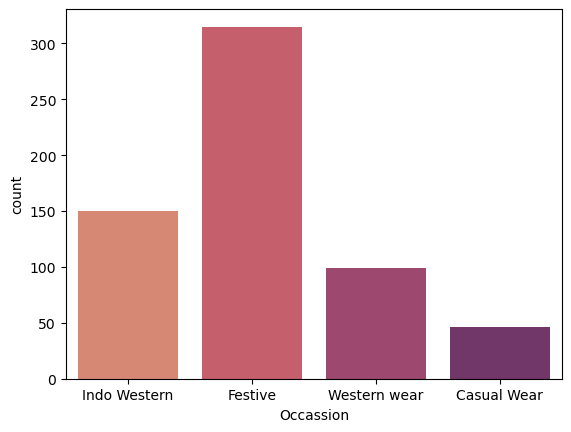

In [113]:
#Let's check distribution of Occassional wear-
sns.countplot(x='Occassion', data=data, palette='flare')
plt.show()

The count of Festive wear is the maximum among all other occasional clothes and Casual wear count is the lowest.

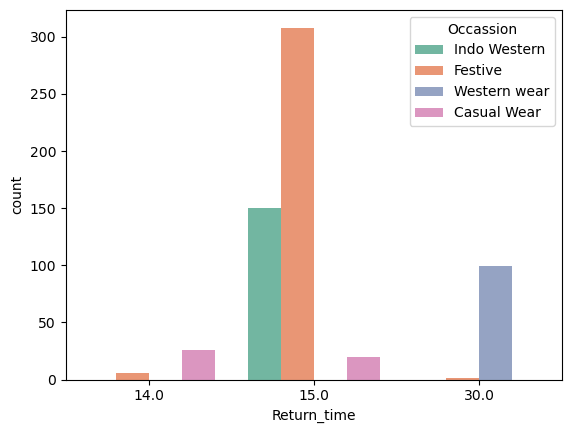

In [114]:
#Let's check count of Return_time on the basis of occassion
sns.countplot(x='Return_time', hue='Occassion', data=data, palette='Set2')
plt.show()

Most number of Festive and Indo Western clothes have 15 days Return period while Western wear has 30 day Return policy.

In [ ]:
#Let's check distribution of Brands-
sns.countplot(x='Brand', data=data, palette='Set3')
plt.xticks(rotation=90, ha='right')
plt.show()

BIBA and Vedant Fashions Ltd. are the highest contributors among all  Brands and have the highest count.

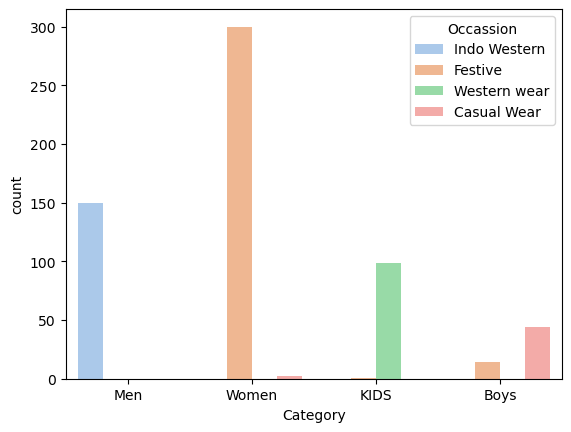

In [116]:
#Let's check count of each Category with respect to Occassion
sns.countplot(x='Category', hue='Occassion', data=data, palette='pastel')
plt.show()

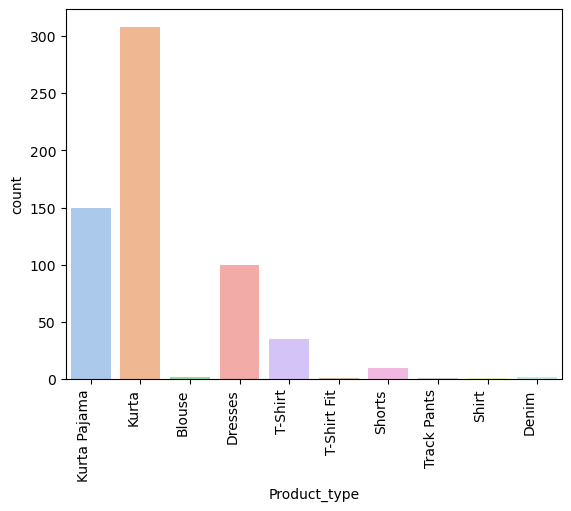

In [117]:
#Let's check count of Product_type
sns.countplot(x='Product_type', data=data, palette='pastel')
plt.xticks(rotation=90, ha='right')
plt.show()

The count of Kurta and Kurta Payjama is highest and Track Pamts, Shirt and Denim are the lowest in numbers.

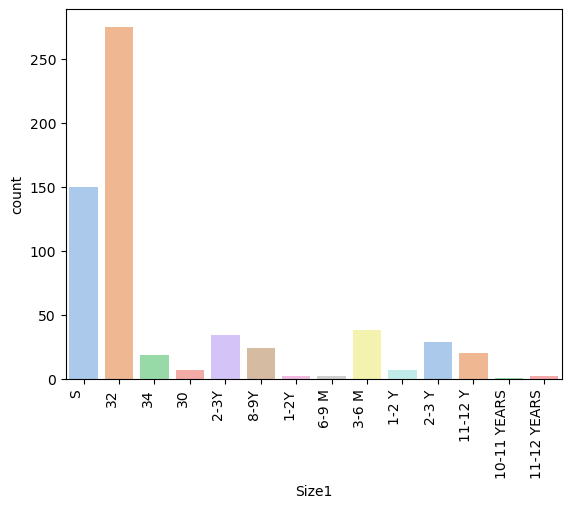

In [118]:
#Let's check count of Size1
sns.countplot(x='Size1', data=data, palette='pastel')
plt.xticks(rotation=90, ha='right')
plt.show()

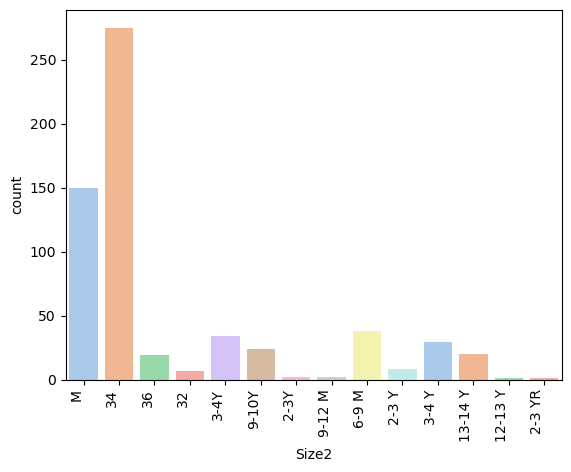

In [119]:
#Let's check count of Size2
sns.countplot(x='Size2', data=data, palette='pastel')
plt.xticks(rotation=90, ha='right')
plt.show()

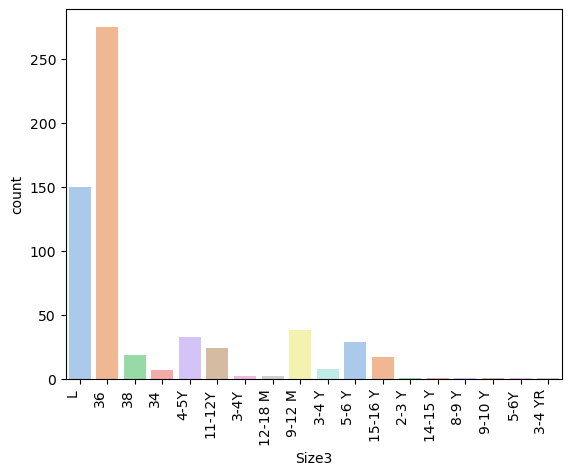

In [120]:
#Let's check count of Size3
sns.countplot(x='Size3', data=data, palette='pastel')
plt.xticks(rotation=90, ha='right')
plt.show()

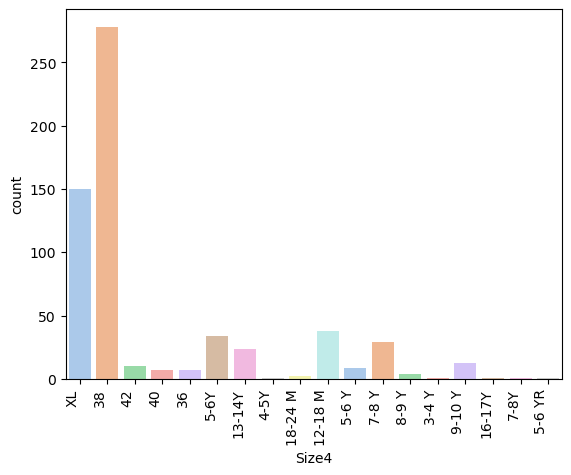

In [121]:
#Let's check count of Size4
sns.countplot(x='Size4', data=data, palette='pastel')
plt.xticks(rotation=90, ha='right')
plt.show()

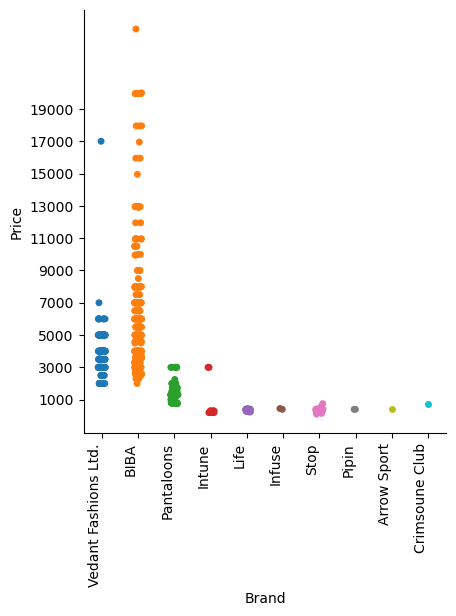

In [122]:
#Let's check Brand with respect to Price
sns.catplot(x='Brand', y='Price', data=data, hue='Brand')
plt.yticks(range(1000,20000, 2000))
plt.xticks(rotation=90, ha='right')
plt.show()

Biba and Vedant Fashion Ltd.have clothes with the highest prices. Infuse, Life, Stop, Pipin, Arrow Sport have lower Price as compared to other Brands.

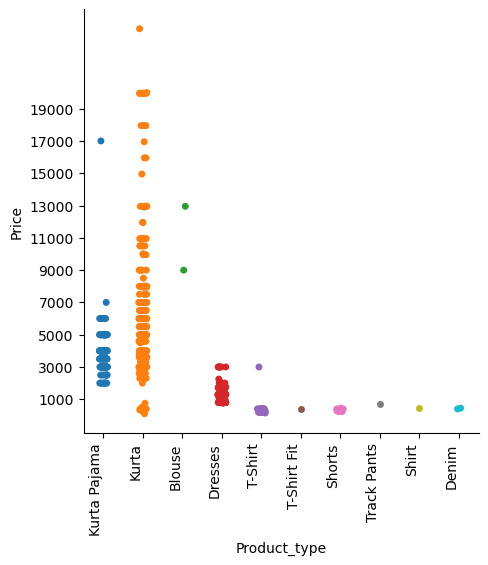

In [125]:
#Let's check Product_type with respect to Price
sns.catplot(x='Product_type', y='Price', data=data, hue='Product_type')
plt.yticks(range(1000,20000, 2000))
plt.xticks(rotation=90, ha='right')
plt.show()

The Price of Kurta and Kurta Payjama is the highest.

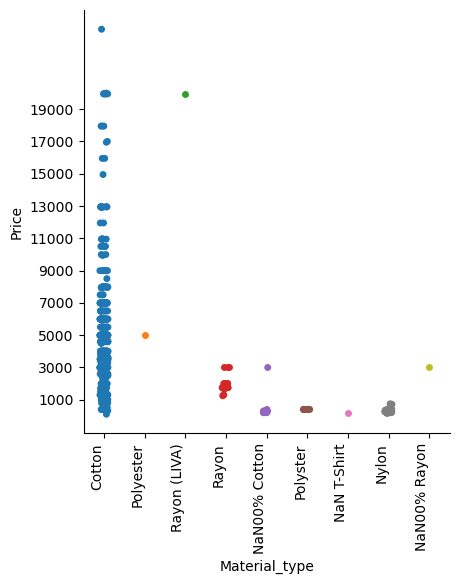

In [127]:
#Let's check Material_type with respect to Price
sns.catplot(x='Material_type', y='Price', data=data, hue='Material_type')
plt.yticks(range(1000,20000,2000))
plt.xticks(rotation=90, ha='right')
plt.show()

Cotton and Rayon(LIVA) clothes are the most costly/priced clothes as compared to other materials.

In [44]:
#Converting Object data type into numericals-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
data.dtypes

Sno                    int64
Brand                 object
Category              object
Product_type          object
Product_Name          object
Product_code          object
Price                  int32
Wear_type             object
Material_type         object
Reviews               object
color1                object
color2                object
Country_of_origin     object
Return_time          float64
Size1                 object
Size2                 object
Size3                 object
Size4                 object
Occassion             object
dtype: object

In [46]:
object_data=['Brand','Category','Product_type','Product_Name','Product_code','Wear_type','Material_type','Reviews','color1','color2','Country_of_origin','Size1','Size2','Size3','Size4','Occassion']

In [47]:
for i in object_data:
    data[i]=le.fit_transform(data[i])

In [48]:
data.dtypes

Sno                    int64
Brand                  int32
Category               int32
Product_type           int32
Product_Name           int32
Product_code           int32
Price                  int32
Wear_type              int32
Material_type          int32
Reviews                int32
color1                 int32
color2                 int32
Country_of_origin      int32
Return_time          float64
Size1                  int32
Size2                  int32
Size3                  int32
Size4                  int32
Occassion              int32
dtype: object

In [49]:
#Gaining more insights about data
data.describe()

,Sno,Brand,Category,Product_type,Product_Name,Product_code,Price,Wear_type,Material_type,Reviews,color1,color2,Country_of_origin,Return_time,Size1,Size2,Size3,Size4,Occassion
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.0,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,304.500000,4.286885,2.140984,3.365574,277.993443,236.367213,4384.172131,12.832787,0.540984,15.632787,32.534426,5.344262,0.0,17.406557,9.291803,8.908197,11.067213,9.196721,1.495082
std,176.236111,3.462868,1.010516,1.222045,156.283047,138.298170,3638.927677,12.342734,1.655699,7.784426,26.418937,6.126969,0.0,5.585457,2.875084,2.993934,4.485745,5.519096,0.852395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152.250000,1.000000,1.000000,3.000000,143.250000,152.250000,1999.000000,4.000000,0.000000,13.000000,7.000000,3.000000,0.0,15.000000,9.000000,8.000000,9.000000,6.000000,1.000000
50%,304.500000,4.000000,2.000000,3.000000,283.500000,203.500000,3999.000000,5.500000,0.000000,21.000000,26.000000,3.000000,0.0,15.000000,9.000000,8.000000,9.000000,6.000000,1.000000
75%,456.750000,8.000000,3.000000,4.000000,411.750000,353.750000,4999.000000,19.000000,0.000000,21.000000,59.000000,3.000000,0.0,15.000000,12.000000,11.000000,16.000000,16.000000,2.000000
max,609.000000,9.000000,3.000000,9.000000,543.000000,504.000000,23950.000000,42.000000,8.000000,21.000000,82.000000,28.000000,0.0,30.000000,13.000000,13.000000,17.000000,17.000000,3.000000


Observations-

1. There are no missing values.

2. The range of standard deviation lies between 1.49 to 4384.1 which means that the scale of distribution varies a lot.

3. Variables like Wear_type, Material_type, color2, Return_time etc have huge difference between 75% and max which clearly indicates presence of outliers.

In [50]:
#Dropping irrelevant column
data.drop(columns=['Sno'],axis=1, inplace=True)

In [51]:
data.shape

(610, 18)

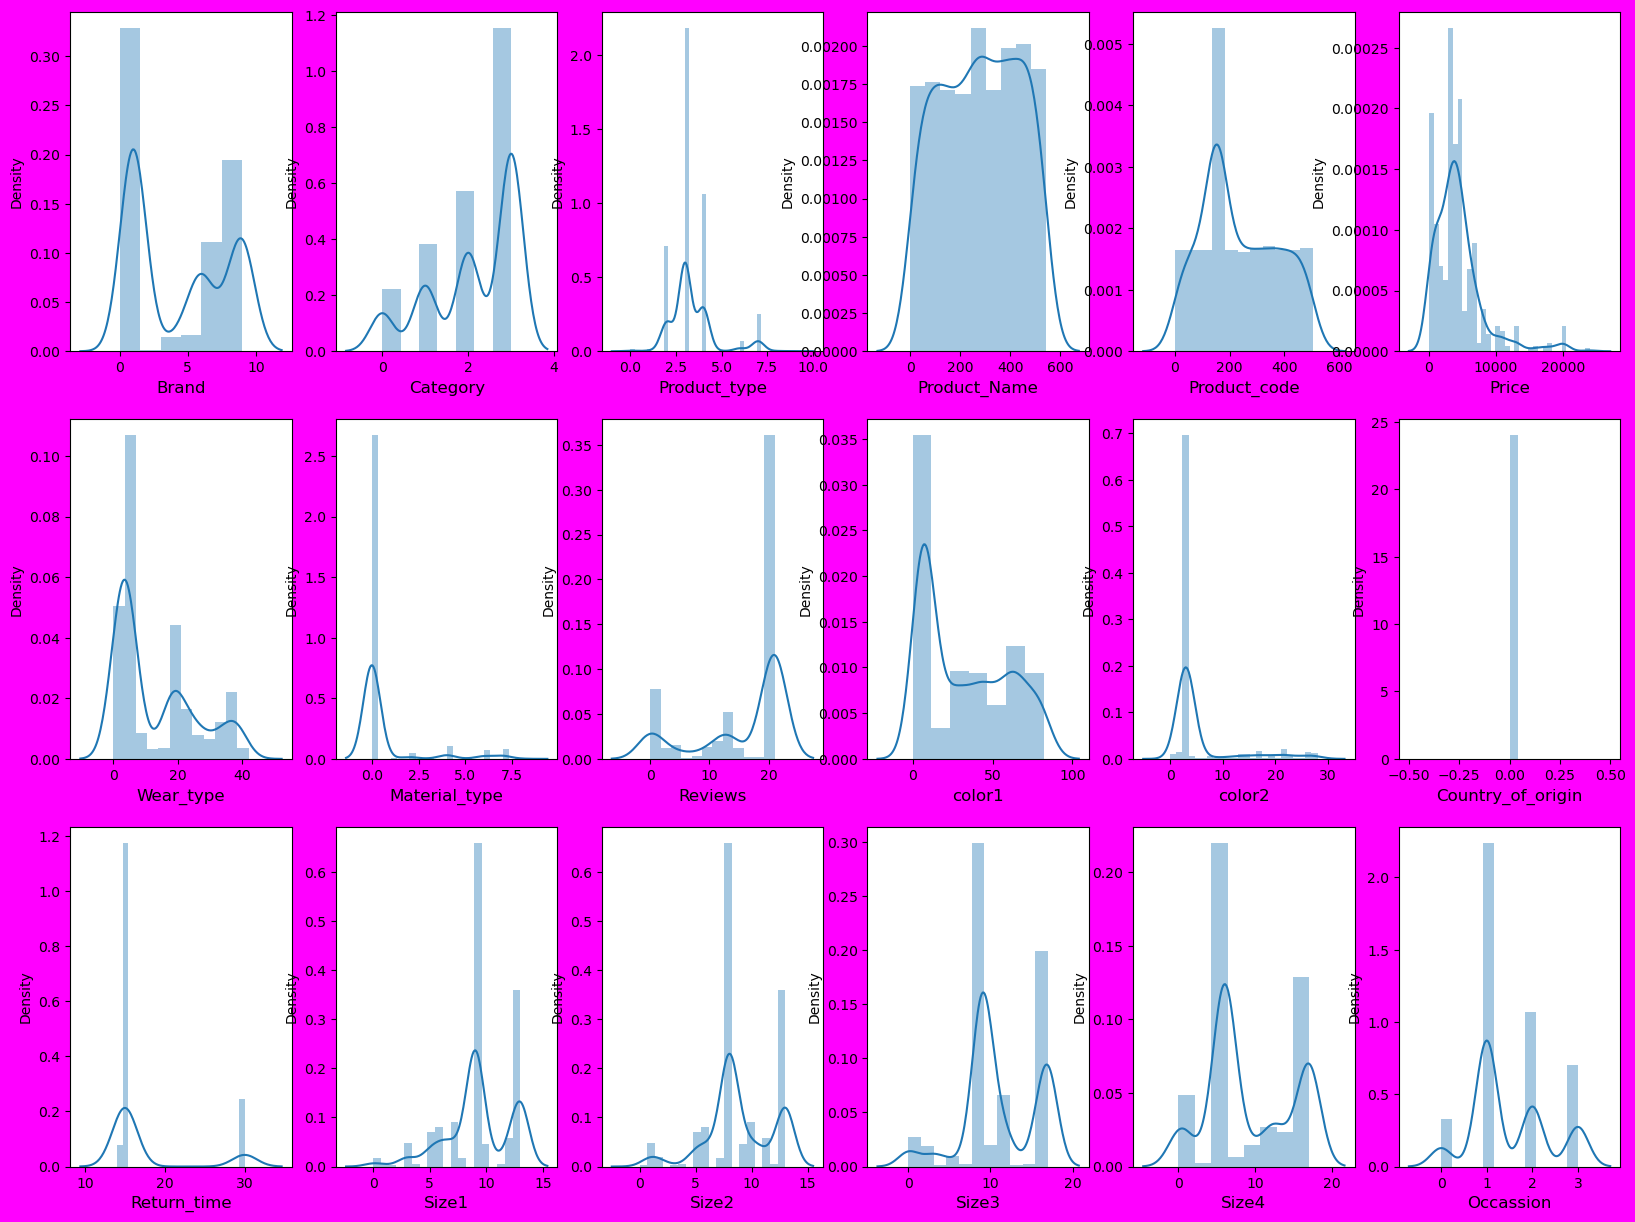

In [138]:
#Let's check distribution of data-
plt.figure(figsize=(20,15), facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=18:
        ax=plt.subplot(3,6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()


A lot of variables like Material_type, color2 etc have skewed distribution.

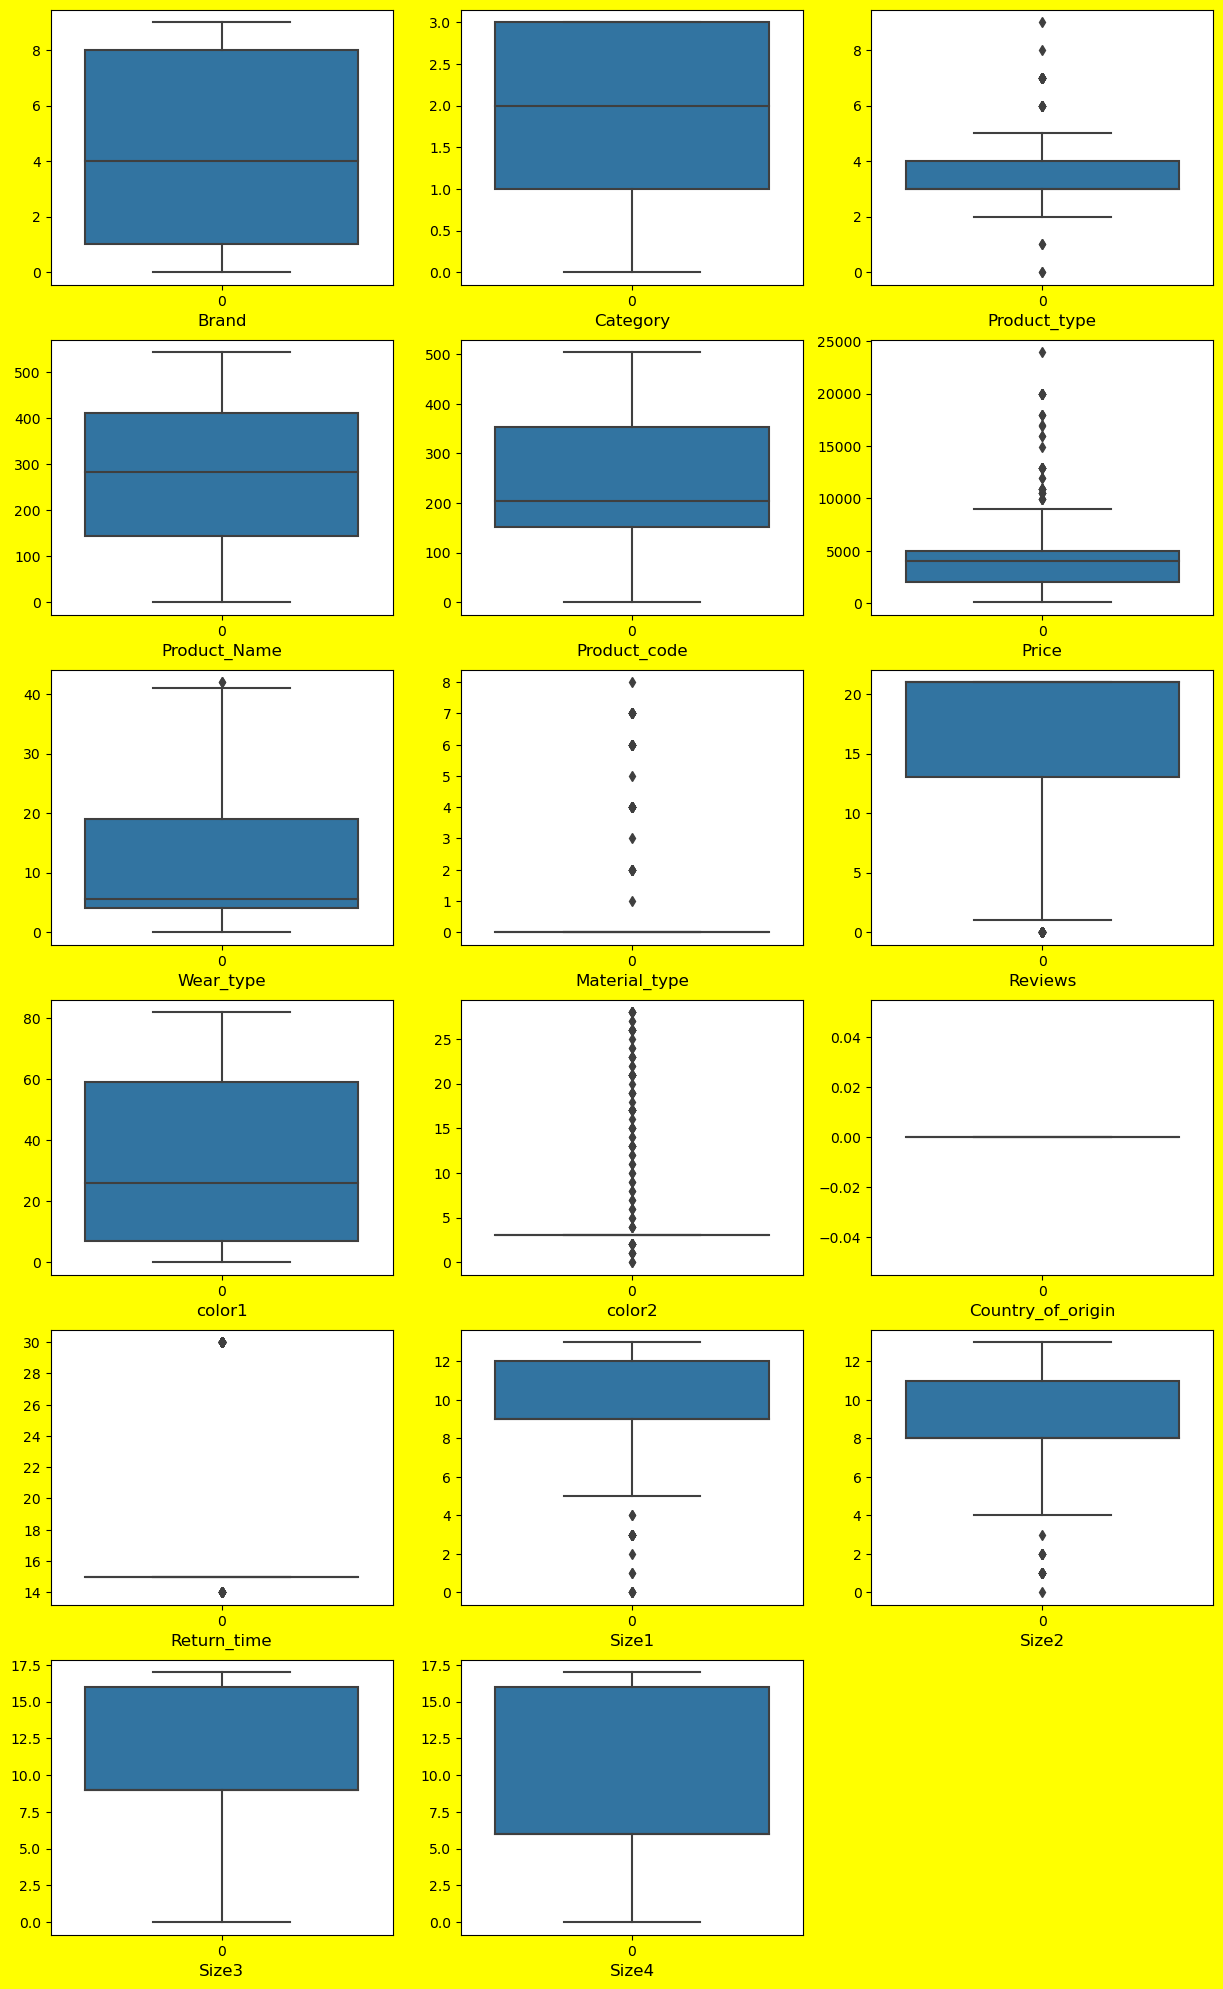

In [139]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<18:
        ax=plt.subplot(6,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show() 

Product_type, Material_type, Reviews, color2, Size1 and Size2 have outliers present.


In [52]:
data.drop(columns=['Country_of_origin'], axis=1, inplace=True)

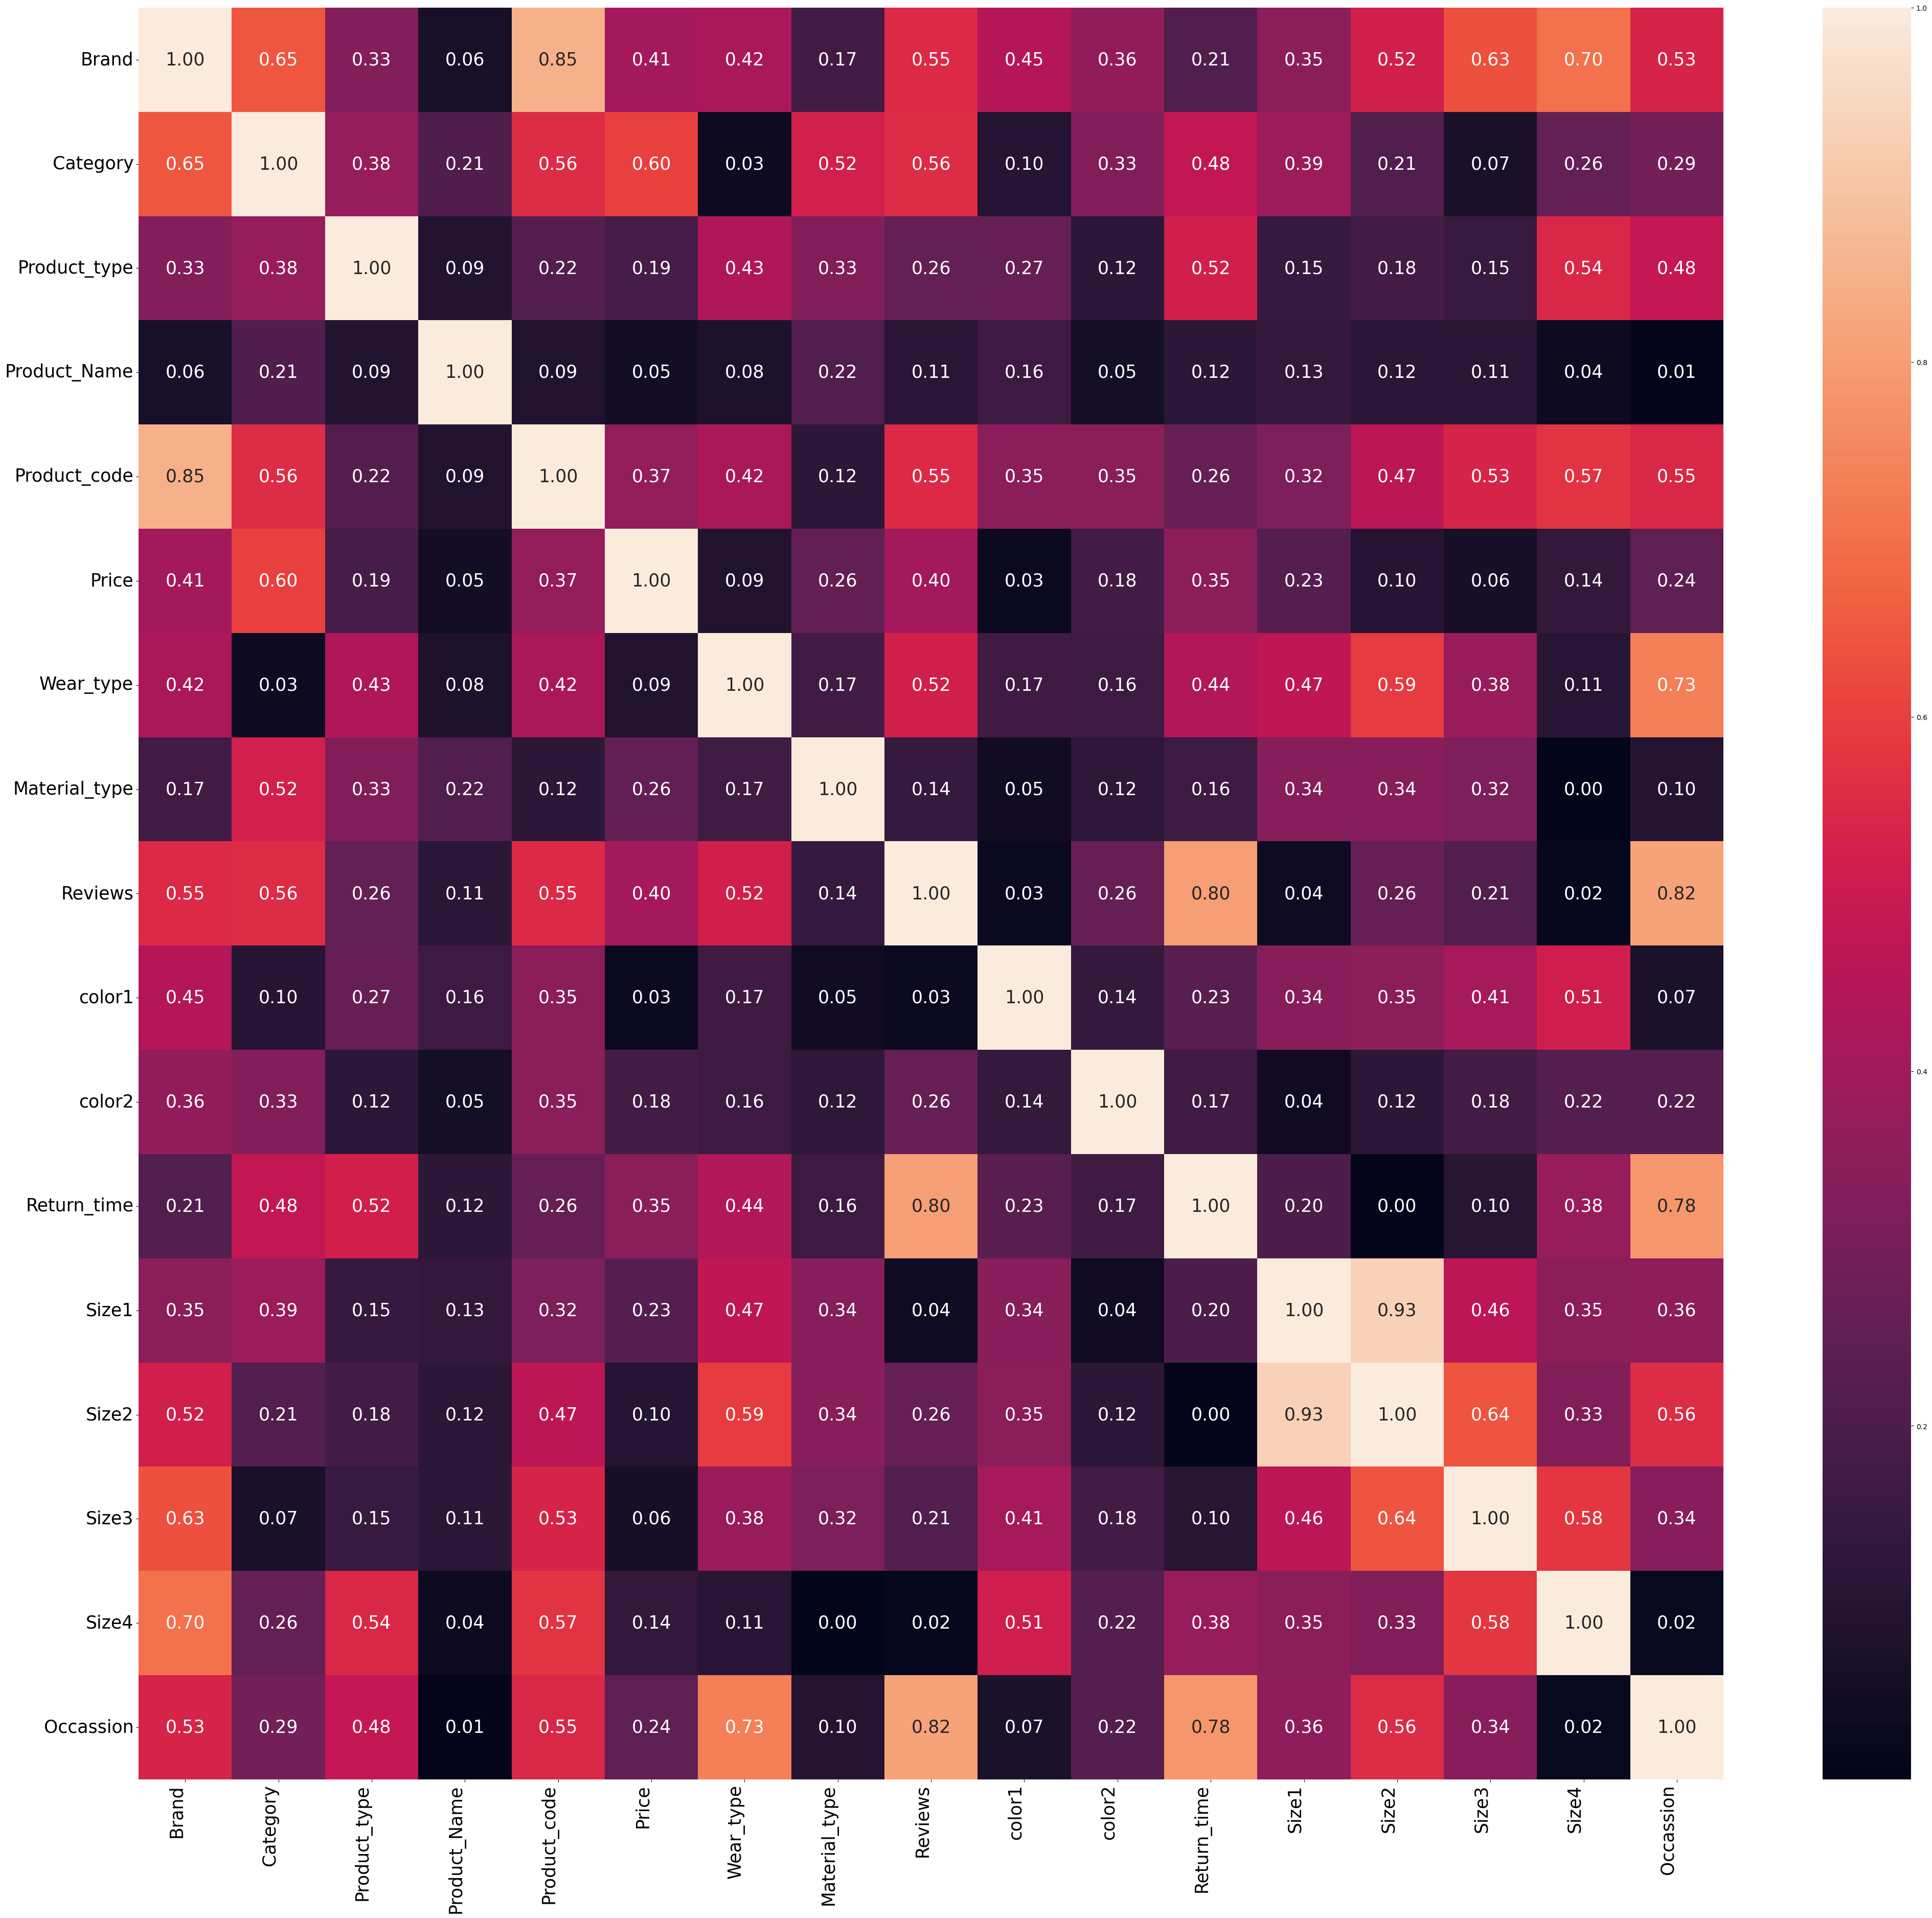

In [142]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,45))
plt.xticks(rotation=90, ha='right', size=25)
plt.yticks(rotation=120, ha='right', size=25)
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.show()

Observations-

1.Size1 and Size2 are highly correlated.

2.Product_code and Brand, Reviews and Return_time and Brand and Category also seem to be correlated.

3.Features like Return_time, Reviews, Product_code, Brand nand Wear_type seem to have huge impact/high correlation with the label (Occassion). Product_Name,color1 and Size4 seem to be least correlated with Occassion.

4.Brand and Category seem correlated with the label Price indicating that the prediction of Price is influenced by these features. color1, Size3 and Wear_type are least correlated with Price.

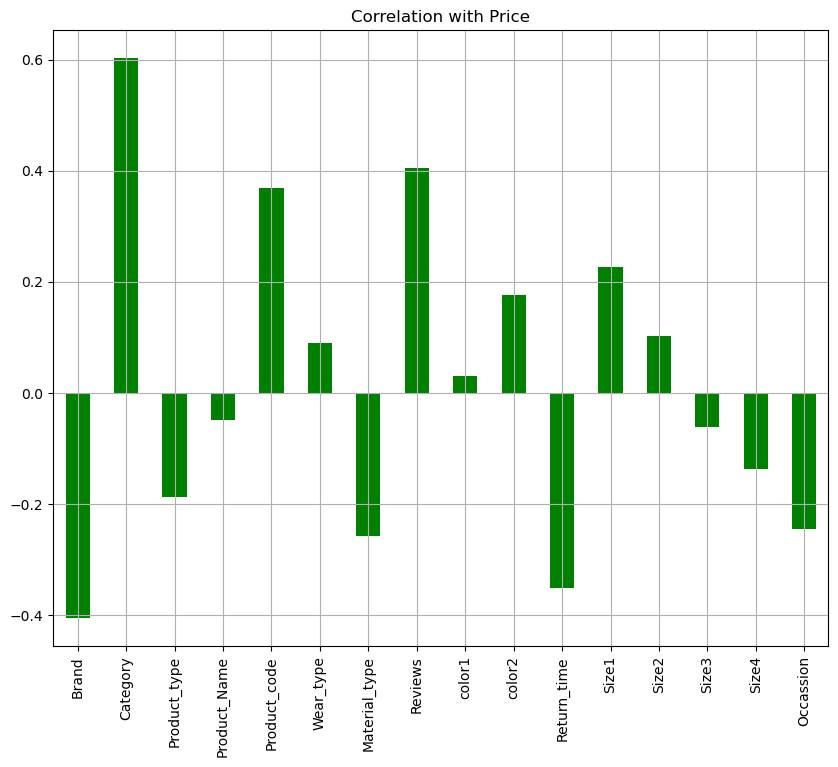

In [147]:
#Let's check the impact of each feature on the label(Price)
data.drop('Price', axis=1).corrwith(data.Price).plot(kind='bar',grid=True, figsize=(10,8), color='g',title='Correlation with Price')
plt.show()

In [53]:
data.corr()["Price"].sort_values()

Brand           -0.405668
Return_time     -0.351381
Material_type   -0.257009
Occassion       -0.244117
Product_type    -0.186850
Size4           -0.136964
Size3           -0.061299
Product_Name    -0.048612
color1           0.029910
Wear_type        0.089392
Size2            0.101841
color2           0.177035
Size1            0.226179
Product_code     0.368443
Reviews          0.404576
Category         0.602672
Price            1.000000
Name: Price, dtype: float64

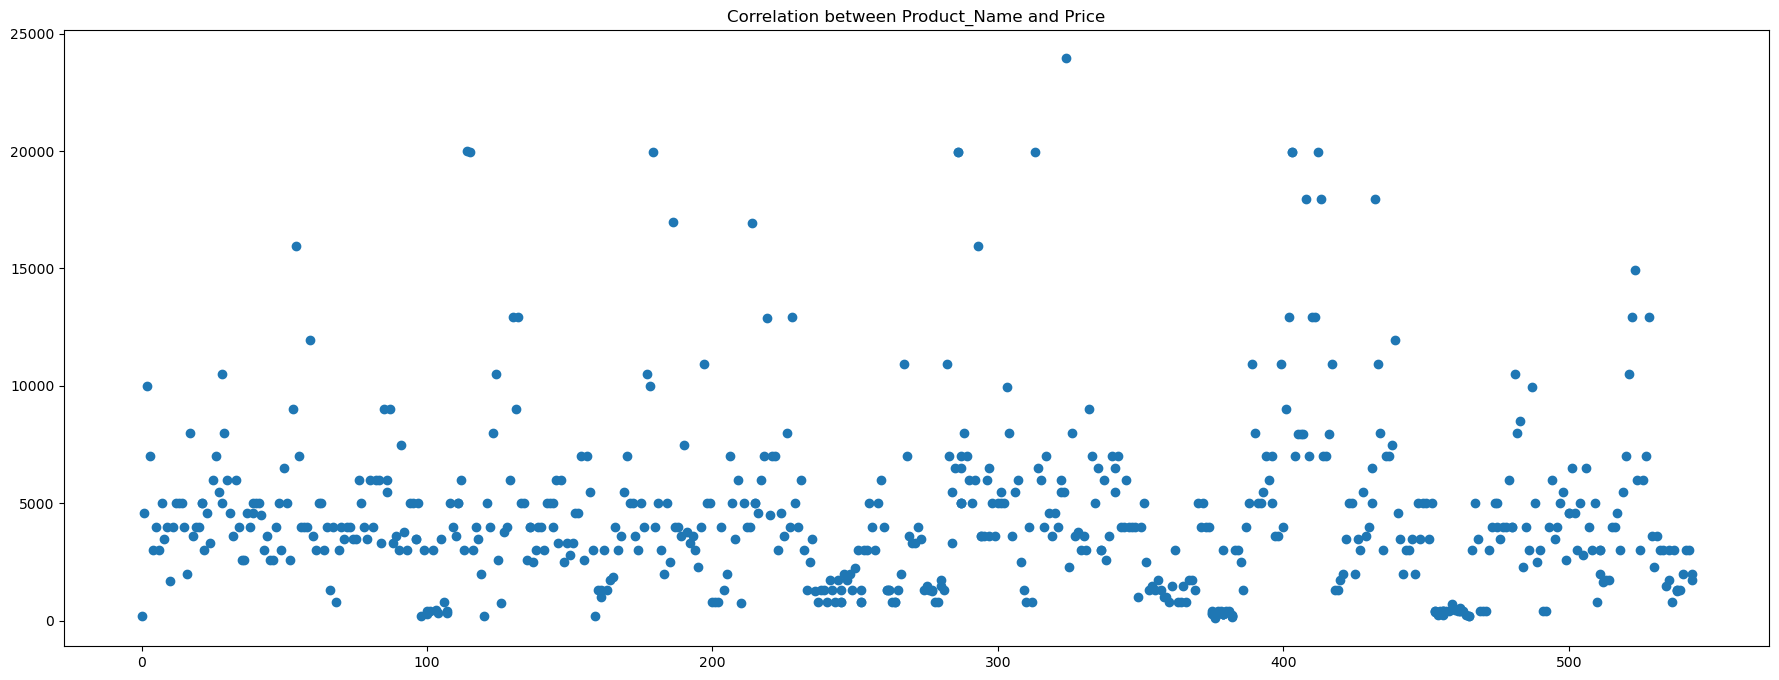

In [150]:
#Correlation between Product_Name and Price
plt.figure(figsize=(22,8))
plt.scatter(x=data['Product_Name'],y=data['Price'])
plt.title('Correlation between Product_Name and Price')
plt.show()

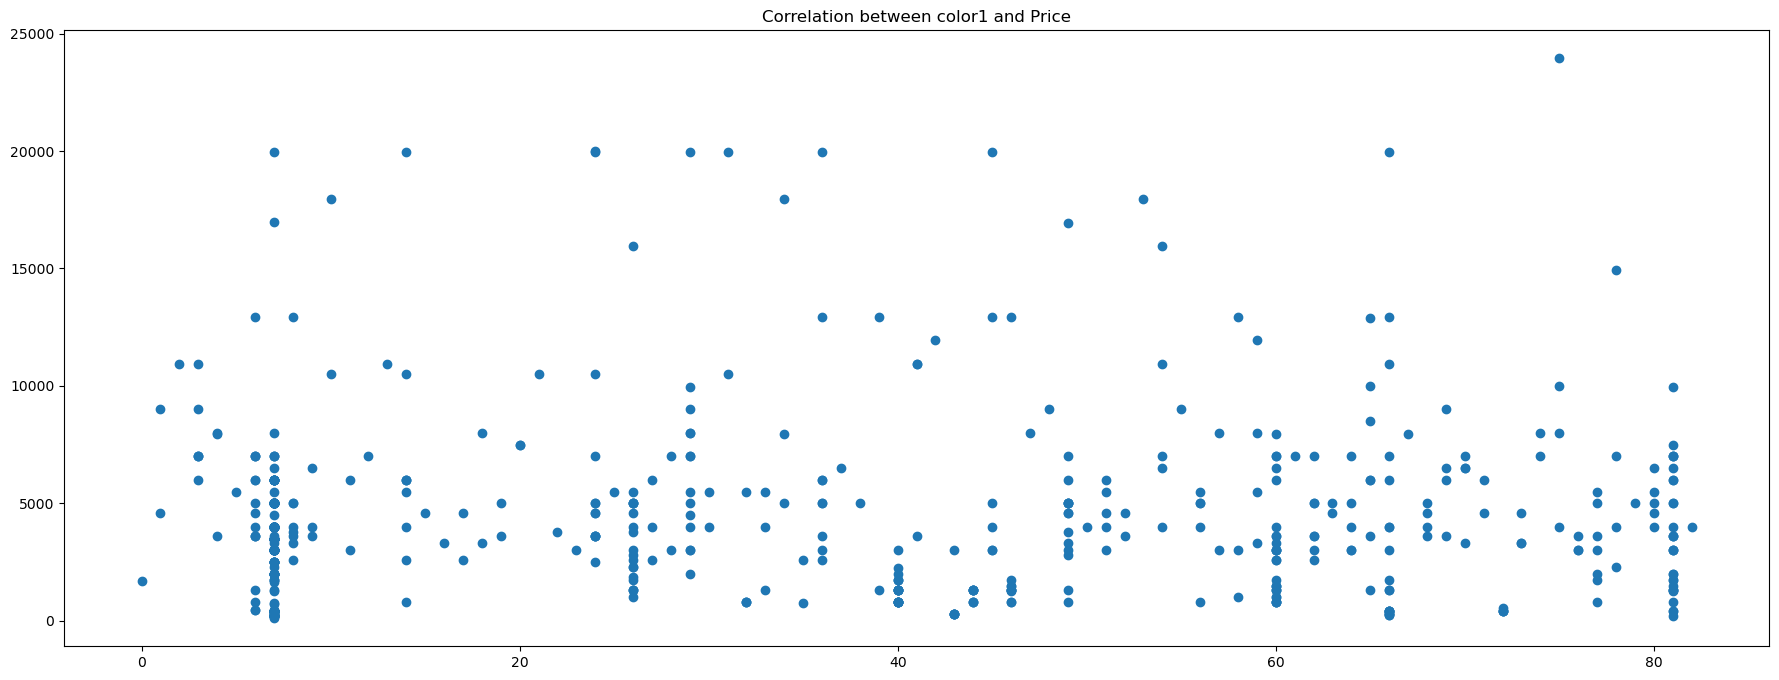

In [151]:
#Correlation between color1 and Price
plt.figure(figsize=(22,8))
plt.scatter(x=data['color1'],y=data['Price'])
plt.title('Correlation between color1 and Price')
plt.show()

It's evident that Product_Name and color1 are least correlated to Price.

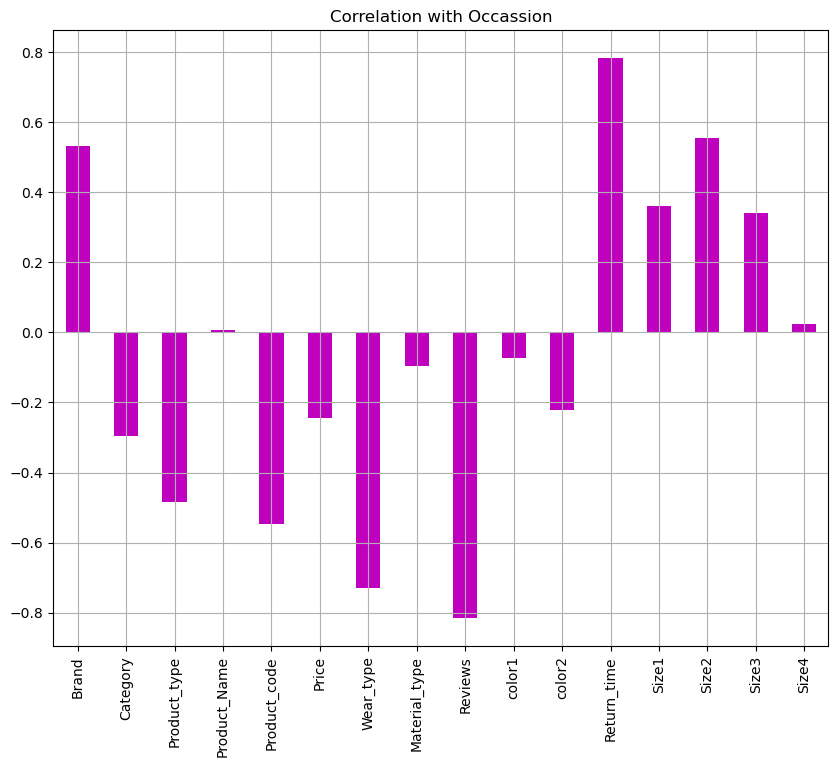

In [146]:
#Let's check the impact of each feature on the label(Occassion)
data.drop('Occassion', axis=1).corrwith(data.Occassion).plot(kind='bar',grid=True, figsize=(10,8), color='m', title='Correlation with Occassion')
plt.show()

In [149]:
data.corr()["Occassion"].sort_values()

Reviews         -0.816168
Wear_type       -0.730973
Product_code    -0.546886
Product_type    -0.484577
Category        -0.294675
Price           -0.244117
color2          -0.222592
Material_type   -0.095844
color1          -0.071998
Product_Name     0.006323
Size4            0.023243
Size3            0.342139
Size1            0.359720
Brand            0.533132
Size2            0.555101
Return_time      0.782636
Occassion        1.000000
Name: Occassion, dtype: float64

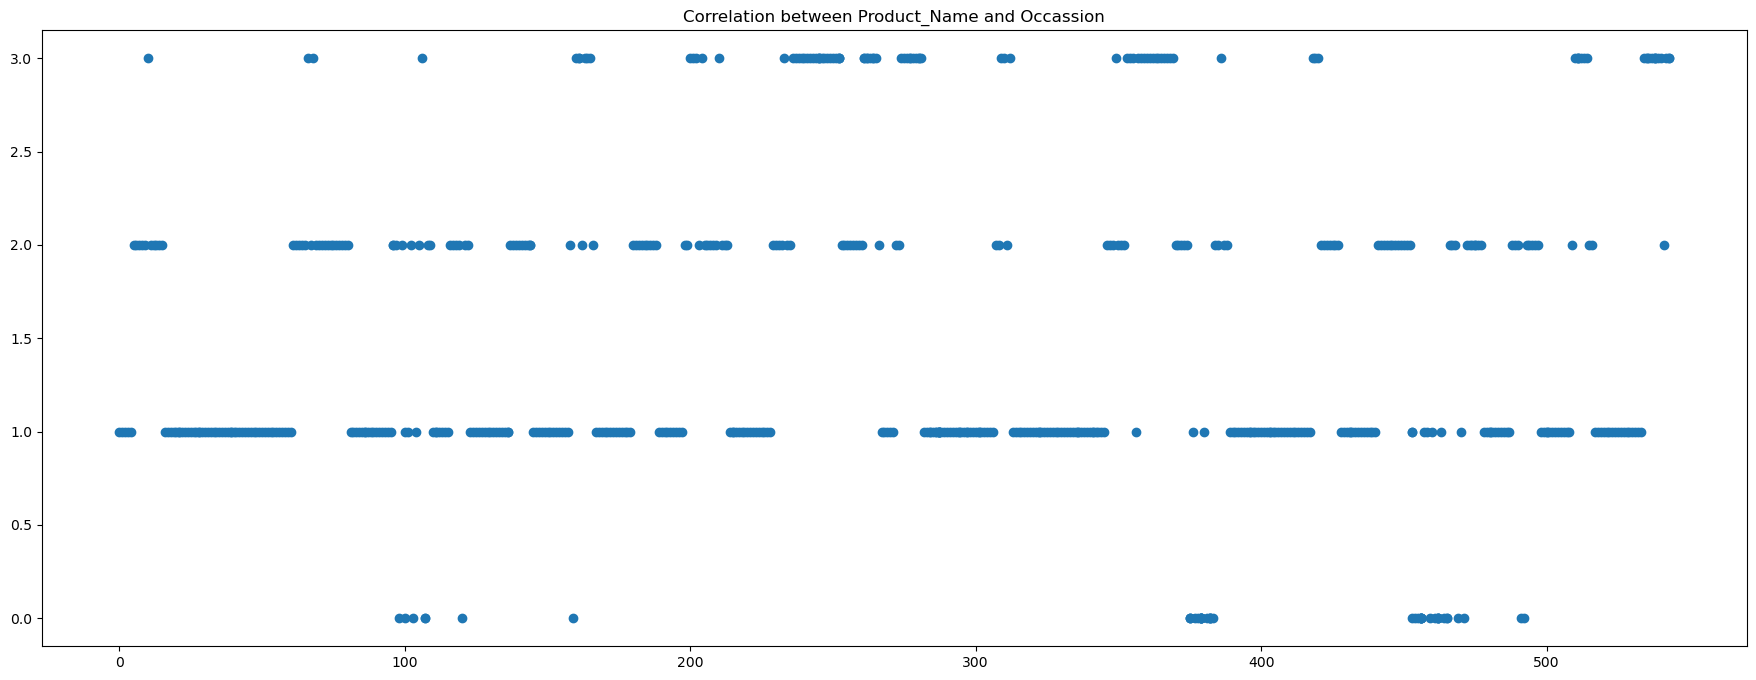

In [152]:
#Correlation between Product_Name and Occassion
plt.figure(figsize=(22,8))
plt.scatter(x=data['Product_Name'],y=data['Occassion'])
plt.title('Correlation between Product_Name and Occassion')
plt.show()

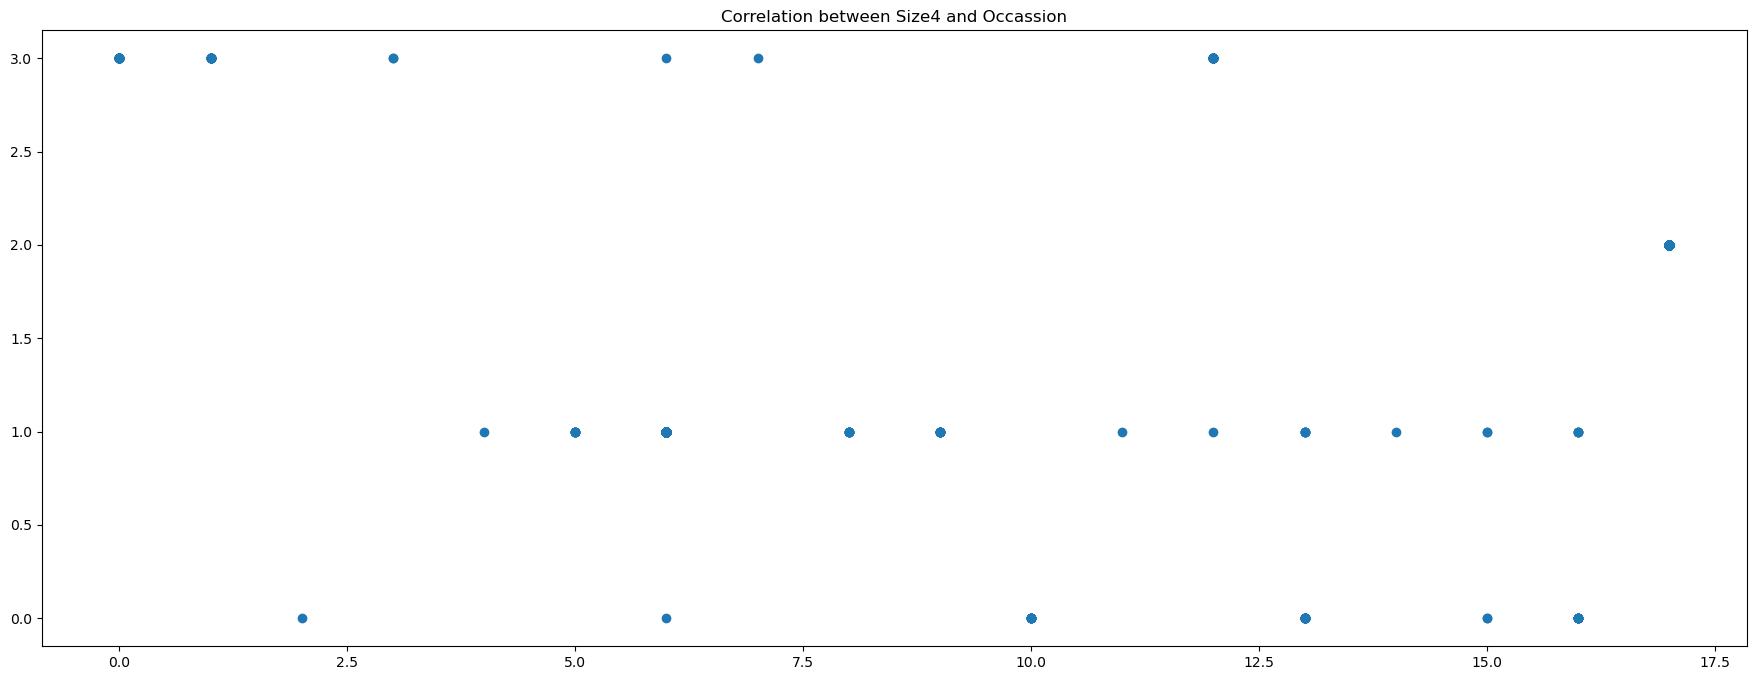

In [153]:
#Correlation between Size4 and Occassion
plt.figure(figsize=(22,8))
plt.scatter(x=data['Size4'],y=data['Occassion'])
plt.title('Correlation between Size4 and Occassion')
plt.show()

Clearly Product_Name and Size4 have the least impact on the label Occassion.

In [54]:
#Handling outliers
from scipy.stats import zscore


In [55]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3).all(axis=1)
data=data[filt_ent]

In [56]:
data.shape

(531, 17)

In [57]:
data.skew()

Brand            0.237665
Category        -0.908439
Product_type     1.379778
Product_Name     0.003069
Product_code     0.295577
Price            1.030537
Wear_type        0.936420
Material_type    4.563938
Reviews         -1.103507
color1           0.484447
color2           2.707485
Return_time      1.894013
Size1           -0.304426
Size2           -0.221297
Size3           -0.201783
Size4            0.194456
Occassion        0.466854
dtype: float64

In [58]:
#Handling skewness
tlist=['Product_type','Material_type','color2','Return_time']
for i in tlist:
    data[i]=np.sqrt(data[i])

In [59]:
data.skew()

Brand            0.237665
Category        -0.908439
Product_type    -0.210967
Product_Name     0.003069
Product_code     0.295577
Price            1.030537
Wear_type        0.936420
Material_type    4.406248
Reviews         -1.103507
color1           0.484447
color2           2.381032
Return_time      1.891835
Size1           -0.304426
Size2           -0.221297
Size3           -0.201783
Size4            0.194456
Occassion        0.466854
dtype: float64

In [60]:
data1=data

In [61]:
data1

,Brand,Category,Product_type,Product_Name,Product_code,Price,Wear_type,Material_type,Reviews,color1,color2,Return_time,Size1,Size2,Size3,Size4,Occassion
0,9,2,2.000000,426,142,3499,4,0.0,13,7,1.732051,3.872983,13,13,17,17,2
1,9,2,2.000000,142,113,4999,4,0.0,13,7,1.732051,3.872983,13,13,17,17,2
2,9,2,2.000000,488,114,4999,4,0.0,13,7,1.732051,3.872983,13,13,17,17,2
3,9,2,2.000000,212,103,3999,4,0.0,21,7,1.732051,3.872983,13,13,17,17,2
4,9,2,2.000000,388,27,4999,4,0.0,13,7,1.732051,3.872983,13,13,17,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,8,0,2.449490,470,170,399,38,2.0,20,7,1.732051,3.741657,5,5,12,13,1
606,8,0,2.449490,107,213,399,35,0.0,20,66,1.732051,3.872983,5,5,12,13,0
607,5,0,2.449490,464,225,239,38,2.0,20,66,1.732051,3.872983,3,1,3,16,0
608,8,0,2.645751,382,158,149,38,2.0,20,7,1.732051,3.872983,5,5,12,13,0


In [62]:
#Separating features and label(Price)
X=data.drop(columns=['Price'], axis=1)
y=data['Price']

In [63]:
y

0      3499
1      4999
2      4999
3      3999
4      4999
       ... 
605     399
606     399
607     239
608     149
609     449
Name: Price, Length: 531, dtype: int32

In [64]:
#Separating features and label(Occassion)
U=data1.drop(columns=['Occassion'], axis=1)
v=data1['Occassion']

In [65]:
v

0      2
1      2
2      2
3      2
4      2
      ..
605    1
606    0
607    0
608    0
609    1
Name: Occassion, Length: 531, dtype: int32

In [66]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_scaled=scaler.fit_transform(X)

In [68]:
X_scaled

array([[ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.26223948,
         1.34273657,  0.56771212],
       [ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.26223948,
         1.34273657,  0.56771212],
       [ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.26223948,
         1.34273657,  0.56771212],
       ...,
       [ 0.17294062, -2.34692898,  2.3135186 , ..., -2.01984806,
         1.16444372, -1.90323161],
       [ 1.0180155 , -2.34692898,  3.00229262, ...,  0.09006536,
         0.62956516, -1.90323161],
       [-0.39044263, -2.34692898,  2.3135186 , ...,  0.09006536,
         0.62956516, -0.66775974]])

In [69]:
U_scaled=scaler.fit_transform(U)

In [70]:
U_scaled

array([[ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.3346769 ,
         1.26223948,  1.34273657],
       [ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.3346769 ,
         1.26223948,  1.34273657],
       [ 1.29970713, -0.2166396 ,  0.73604796, ...,  1.3346769 ,
         1.26223948,  1.34273657],
       ...,
       [ 0.17294062, -2.34692898,  2.3135186 , ..., -2.90066235,
        -2.01984806,  1.16444372],
       [ 1.0180155 , -2.34692898,  3.00229262, ..., -1.4888826 ,
         0.09006536,  0.62956516],
       [-0.39044263, -2.34692898,  2.3135186 , ..., -1.4888826 ,
         0.09006536,  0.62956516]])

In [71]:
#Handling multicollinearity with PCA
from sklearn.decomposition import PCA
pca=PCA()

In [72]:
pca.fit_transform(X_scaled)

array([[ 3.02171719e+00, -1.39618628e+00, -2.37642606e-01, ...,
        -2.61558687e-02, -3.26802321e-03, -5.40584310e-03],
       [ 3.09828408e+00, -1.53284789e+00, -4.52449759e-01, ...,
        -1.60463635e-02, -4.27361667e-03, -1.61231471e-03],
       [ 3.09288268e+00, -1.36640886e+00, -1.57067718e-01, ...,
        -2.41752447e-02, -4.48039773e-03, -4.76851733e-03],
       ...,
       [-2.97890513e+00, -8.07641607e-01,  7.22659154e+00, ...,
         2.55959440e-02, -1.07713294e-05, -9.81424065e-02],
       [-7.80541477e-01, -2.30870743e+00,  6.74028089e+00, ...,
         3.98593356e-01, -1.69064999e-01,  3.81866175e-02],
       [-5.87722348e-01, -7.93828883e-01,  3.54157199e+00, ...,
        -3.17451733e-01,  8.72060525e-01, -2.59319810e-01]])

In [73]:
pca.fit_transform(U_scaled)

array([[ 3.07174432e+00, -1.19687810e+00,  6.27277705e-02, ...,
        -8.42308056e-03,  8.49498755e-03, -6.26310675e-03],
       [ 3.06110522e+00, -1.56532952e+00, -1.21472832e-01, ...,
         3.16136103e-02,  4.06657287e-03, -3.54342785e-05],
       [ 3.05272245e+00, -1.33647122e+00, -4.08640982e-03, ...,
        -4.88804983e-03,  6.65560953e-03, -3.79419147e-03],
       ...,
       [-1.64130024e+00,  3.07422498e+00,  6.90270951e+00, ...,
        -2.83610209e-01, -1.29681989e-03, -9.81679503e-02],
       [ 7.12909021e-01,  1.72829603e+00,  6.81866073e+00, ...,
        -4.00393554e-01,  1.21208431e-01,  3.28908773e-02],
       [ 1.60424588e-01,  1.38687701e+00,  3.59978710e+00, ...,
         4.52324022e-01, -8.29500946e-01, -2.53127902e-01]])

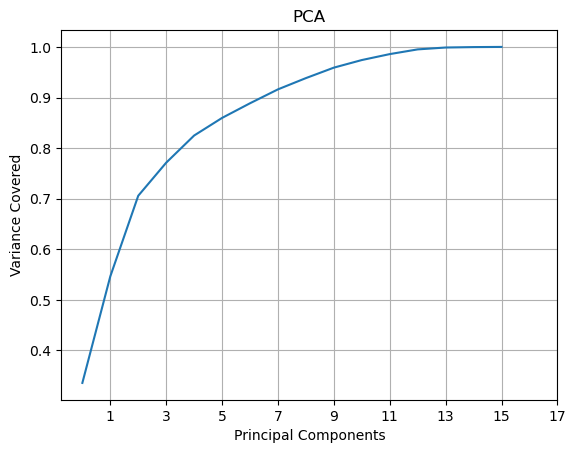

In [74]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,18, 2))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

We can see that at 14 features almost 100% of the variance is being covered so, this is the best number of features we can go ahead with.

In [75]:
pca=PCA(n_components=14)
new_comp=pca.fit_transform(X_scaled)

In [76]:
princi_comp=pd.DataFrame(new_comp)

In [77]:
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.021717,-1.396186,-0.237643,-1.071298,0.149432,-0.370284,0.032195,-0.175725,-0.037629,-0.125284,-0.382060,0.220422,0.015845,-0.026156
1,3.098284,-1.532848,-0.452450,0.588306,-0.044648,0.271796,0.003089,0.025167,0.006685,-0.074889,-0.230394,0.129190,0.044950,-0.016046
2,3.092883,-1.366409,-0.157068,-1.446995,0.201982,-0.476487,0.012745,-0.155243,-0.002767,-0.065587,-0.259164,0.132719,-0.009296,-0.024175
3,2.843108,-1.862731,-0.449542,0.139608,-0.073832,0.106780,0.145608,-0.043810,0.184250,0.276277,0.264444,0.756620,-0.210522,0.020003
4,3.316407,-1.414657,-0.157371,-0.892573,0.156413,-0.174425,-0.055221,0.059400,0.112451,0.110288,0.143183,-0.140119,-0.041068,-0.011249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.507649,-1.710299,6.435380,-0.312871,0.537340,-0.534753,0.305630,0.069580,-1.329890,0.751645,-0.193074,0.250701,-0.641336,-0.564500
527,-1.117432,-1.086560,3.510146,0.611156,-0.303006,2.368667,-1.583593,-0.195464,0.654877,-1.227123,0.658348,1.007343,1.196394,0.370709
528,-2.978905,-0.807642,7.226592,-0.673646,0.133880,0.721327,0.975032,0.917928,0.440422,0.183923,-0.608175,-0.161519,-0.418233,0.025596
529,-0.780541,-2.308707,6.740281,0.120976,0.448344,-0.136052,0.408177,0.044829,-1.406827,0.316995,0.080812,-0.002392,-0.185576,0.398593


In [78]:
new_comp1=pca.fit_transform(U_scaled)

In [79]:
princi_comp1=pd.DataFrame(new_comp1)

In [80]:
princi_comp1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.071744,-1.196878,0.062728,-1.012217,0.234222,0.233311,0.068899,-0.313669,-0.273770,0.002165,-0.121584,-0.441131,0.169651,-0.008423
1,3.061105,-1.565330,-0.121473,0.531529,-0.110829,-0.112313,-0.040839,0.442482,0.163711,-0.013190,-0.179416,-0.121881,0.157392,0.031614
2,3.052722,-1.336471,-0.004086,-1.492884,0.252635,0.480772,0.016564,0.031880,-0.118841,0.012125,-0.120805,-0.212364,0.122888,-0.004888
3,2.895940,-1.744967,0.181392,0.179738,-0.069832,-0.162354,0.159884,-0.071599,-0.089807,0.221798,0.387633,0.149821,0.671665,-0.228990
4,3.287903,-1.350374,-0.019127,-0.947924,0.175292,0.236259,-0.068873,0.143372,0.145970,0.089494,0.079777,0.204551,-0.115848,0.000816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.550020,1.789978,6.575353,-0.605162,0.363560,0.668819,0.315773,0.326348,0.010241,-1.272064,0.699674,-0.215917,-0.000766,-0.097105
527,0.000961,1.434530,3.450682,0.662034,-0.252422,-2.360450,-1.635889,0.060138,-0.251576,0.658338,-1.018481,0.619230,1.343773,0.520185
528,-1.641300,3.074225,6.902710,-0.961773,0.032474,-0.555084,0.938677,0.521863,1.084857,0.368075,-0.012333,-0.470157,-0.276214,-0.283610
529,0.712909,1.728296,6.818661,-0.125596,0.308233,0.299957,0.386524,0.355896,0.010574,-1.414296,0.263672,0.086991,0.006959,-0.400394


In [81]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test=train_test_split(princi_comp, y, test_size=0.25, random_state=42)

In [83]:
y_train

455    1749
20     5999
390    2799
57     4999
326    6995
       ... 
72     2499
107    2999
289    6500
488     799
103    3499
Name: Price, Length: 398, dtype: int32

In [84]:
U_train,U_test,v_train,v_test=train_test_split(princi_comp1, v, test_size=0.25, random_state=42)

In [85]:
v_train

455    3
20     2
390    1
57     2
326    1
      ..
72     2
107    2
289    1
488    3
103    2
Name: Occassion, Length: 398, dtype: int32

In [86]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, U_train, U_test, v_train, v_test, train=True):
    if train:
        v_pred=clf.predict(U_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(v_train,v_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(U_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(v_test,pred)*100:.2f}%")

In [87]:
#Using K Neighbors Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [88]:
knn.fit(U_train,v_train)

KNeighborsClassifier()

In [89]:
metric_score(knn,U_train, U_test, v_train, v_test, train=True)
metric_score(knn,U_train, U_test, v_train, v_test,train=False)


---------------Train Result-------------
Accuracy Score:98.74%

---------------Test Result-------------
Accuracy Score:96.99%


In [90]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [91]:
for k in range(3,6):
    cv_score=cross_val_score(knn,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.888888888888889


 at 4, cross val score is 0.9058441558441559


 at 5, cross val score is 0.9098219008993123




In [92]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [93]:
rf.fit(U_train,v_train)

RandomForestClassifier()

In [94]:
metric_score(rf,U_train, U_test, v_train, v_test, train=True)
metric_score(rf,U_train, U_test, v_train, v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:97.74%


In [95]:
for k in range(3,6):
    cv_score=cross_val_score(rf,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.9661016949152543


 at 4, cross val score is 0.9678884711779449


 at 5, cross val score is 0.9661082701463586




In [96]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [97]:
gbdt.fit(U_train,v_train)

GradientBoostingClassifier()

In [98]:
metric_score(gbdt,U_train, U_test, v_train, v_test, train=True)
metric_score(gbdt,U_train, U_test, v_train, v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:96.99%


In [99]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.951035781544256


 at 4, cross val score is 0.9547305764411027


 at 5, cross val score is 0.9548933168753306




In [100]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [101]:
xgb.fit(U_train,v_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [102]:
metric_score(xgb,U_train, U_test, v_train, v_test, train=True)
metric_score(xgb,U_train, U_test, v_train, v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:96.24%


In [103]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.9642184557438794


 at 4, cross val score is 0.9641290726817041


 at 5, cross val score is 0.9679950625991889




It's evident that we are getting the best accuracy score 97.74% from Random Forest Classifier model. The cross validation score at cv=4 is 96.74%.
Other model which is again performing well is Gradient Boosting classifier and KNN models with accuracy score of 96.99% however, Random Forest Classifier model has a higher score.
We can conclude that Random Forest Classifier model is the best fitted model as it works great on test data.

In [104]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={'max_depth':[30,40,60],
             'n_jobs':[1, 2],
             'n_estimators':[50,100],
            'criterion':['gini','entropy']
            }

In [106]:
gridsearch=GridSearchCV(estimator=rf, param_grid=param_grid, cv=4)

In [107]:
gridsearch.fit(U_train,v_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 60], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [108]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 100, 'n_jobs': 1}

In [110]:
Final_model=RandomForestClassifier(criterion= 'entropy', max_depth= 40, n_jobs=1, n_estimators=100)

In [111]:
Final_model.fit(U_train,v_train)

RandomForestClassifier(criterion='entropy', max_depth=40, n_jobs=1)

In [112]:
pred=Final_model.predict(U_test)

In [115]:
acc=accuracy_score(v_test,pred)
print(acc*100)

97.74436090225564


In [116]:
#Predicting primary fuel
v_pred = Final_model.predict(U_test)
datan = pd.DataFrame({'Actual' : v_test, 'RFR predicted': v_pred})

In [117]:
datan

,Actual,GBDT predicted
595,0,0
7,2,2
350,1,1
458,3,3
559,1,1
...,...,...
381,1,1
371,1,1
518,3,3
300,1,1


In [118]:
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [120]:
reg.fit(X_train,y_train)


LinearRegression()

In [121]:
pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train)}")
print(f" testing accuracy is {r2_score(y_test,pred_test)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.4937012846102332
 testing accuracy is 0.5725463116232835
Mean Absolute Error Score: 1058.3985420189804


In [123]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [124]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [125]:
pred_train1=gbr.predict(X_train)
pred_test1=gbr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train1)}")
print(f" testing accuracy is {r2_score(y_test,pred_test1)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.8990330571727858
 testing accuracy is 0.4823383691090183
Mean Absolute Error Score: 1154.9573825622494


In [127]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [128]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [129]:
pred_train2=rfr.predict(X_train)
pred_test2=rfr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train2)}")
print(f" testing accuracy is {r2_score(y_test,pred_test2)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test2)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9274696298824933
 testing accuracy is 0.4457707025590505
Mean Absolute Error Score: 1119.3059210526317


We can see that Linear Regression model works best on test data and Mean absolute score is the lowest. We are getting r2 score of 57.25% with this model and Mean Absolute Error score of 1058. Hence, Linear Regression model seems to be the best model and we will move ahead with this.

In [132]:
y_pred1 = rfr.predict(X_test)
datan1 = pd.DataFrame({'Actual' : y_test, 'Reg predicted': y_pred1})

In [133]:
datan1

,Actual,Reg predicted
595,239,344.91
7,4999,3828.96
350,12950,9931.30
458,1499,1379.50
559,199,310.10
...,...,...
381,3999,5134.31
371,3299,4926.05
518,1299,1484.50
300,5995,6807.67
